In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
#Import data
df = pd.read_csv('doordash.csv')
print(df.shape)
df.head()

(11181, 22)


,searched_zipcode,searched_lat,searched_lng,searched_address,searched_state,searched_city,searched_metro,latitude,longitude,distance,...,address,cuisines,delivery_time_raw,delivery_time,review_count,review_rating,RunDate,Specialty Items,Meal Types,Dietary Preferences
0,10003,40.732473,-73.987380,"41 Cooper Square, 7 E 7th St, New York, NY 100...",NY,New York,NY,40.675464,-73.980782,1.594482,...,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese,24 - 34,29,1364,4.8,25/04/22 7:01,Vietnamese|Miscellaneous|Sandwiches,Miscellaneous,Miscellaneous
1,11219,40.631075,-73.997695,"4701 15th Ave, Brooklyn, NY 11219, USA",NY,Brooklyn,NY,40.675464,-73.980782,1.594482,...,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese,24 - 34,29,1364,4.8,25/04/22 7:01,Vietnamese|Miscellaneous|Sandwiches,Miscellaneous,Miscellaneous
2,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,40.675464,-73.980782,1.594482,...,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese,24 - 34,29,1364,4.8,25/04/22 7:01,Vietnamese|Miscellaneous|Sandwiches,Miscellaneous,Miscellaneous
3,11219,40.631075,-73.997695,"4701 15th Ave, Brooklyn, NY 11219, USA",NY,Brooklyn,NY,40.672978,-73.950462,0.404577,...,"752 Nostrand Ave, Brooklyn, NY 11216, USA",Mexican,23 - 33,28,2000,4.6,25/04/22 7:01,Miscellaneous|Tacos,Brunch|Miscellaneous,Miscellaneous
4,10003,40.732473,-73.987380,"41 Cooper Square, 7 E 7th St, New York, NY 100...",NY,New York,NY,40.672978,-73.950462,0.404577,...,"752 Nostrand Ave, Brooklyn, NY 11216, USA",Mexican,23 - 33,28,2000,4.6,25/04/22 7:01,Miscellaneous|Tacos,Brunch|Miscellaneous,Miscellaneous


In [5]:
print("Columns = ")
df.columns

Columns = 


Index(['searched_zipcode', 'searched_lat', 'searched_lng', 'searched_address',
       'searched_state', 'searched_city', 'searched_metro', 'latitude',
       'longitude', 'distance', 'loc_name', 'loc_number', 'address',
       'cuisines', 'delivery_time_raw', 'delivery_time', 'review_count',
       'review_rating', 'RunDate', 'Specialty Items', 'Meal Types',
       'Dietary Preferences'],
      dtype='object')

In [6]:
df.isna().sum()


,0
searched_zipcode,0
searched_lat,0
searched_lng,0
searched_address,0
searched_state,0
searched_city,0
searched_metro,0
latitude,0
longitude,0
distance,0


In [7]:
df.columns

Index(['searched_zipcode', 'searched_lat', 'searched_lng', 'searched_address',
       'searched_state', 'searched_city', 'searched_metro', 'latitude',
       'longitude', 'distance', 'loc_name', 'loc_number', 'address',
       'cuisines', 'delivery_time_raw', 'delivery_time', 'review_count',
       'review_rating', 'RunDate', 'Specialty Items', 'Meal Types',
       'Dietary Preferences'],
      dtype='object')



```
Most Popular Cuisines by City
Top Rated Cuisines
```



In [8]:
df_cuisines = df[["searched_city", "cuisines", "review_rating", "searched_state"]]
# Explode the cuisines column to create a row for each cuisine
df = df.assign(cuisine=df['cuisines'].str.split('|')).explode('cuisine')

# Filter out cuisines labeled as "Miscellaneous"
df = df[df['cuisine'] != 'Miscellaneous']

# 2. Group by city and cuisine, and count the occurrences of each cuisine
cuisine_counts = df.groupby(["searched_city", "cuisine"]).size().reset_index(name="count")

# 3. Find the most popular cuisines in each city
# Sort by city and count in descending order
cuisine_counts = cuisine_counts.sort_values(["searched_city", "count"], ascending=[True, False])

# Get the most popular cuisine in each city using groupby and idxmax
popular_cuisines = cuisine_counts.loc[cuisine_counts.groupby("searched_city")["count"].idxmax()]

# 4. Calculate the average review rating for each cuisine
average_ratings = df.groupby("cuisine")["review_rating"].mean().reset_index(name="average_rating")

# Sort by average rating in descending order
top_rated_cuisines = average_ratings.sort_values("average_rating", ascending=False)

# 5. Save results to CSV
popular_cuisines.to_csv("popular_cuisines.csv", index=False)
top_rated_cuisines.to_csv("top_rated_cuisines.csv", index=False)

# 6. Display results
print("Most Popular Cuisines by City:")
print(popular_cuisines)

print("\nTop Rated Cuisines:")
print(top_rated_cuisines.head(20))

Most Popular Cuisines by City:
       searched_city   cuisine  count
8            Anaheim   Mexican     35
14           Astoria  American     24
21           Belmont   Italian     12
27            Boston  American    160
44          Brooklyn  American    547
71           Burbank   Mexican     75
85         Cambridge   Italian     86
101      Charlestown   Italian     85
112          Chicago  American    413
132       Dorchester  American     43
157         Glendale   Mexican     74
165         Glenview  American     56
189           Irvine   Mexican     35
195      Jersey City  American     84
215        La Grange  American     29
235      Los Angeles   Mexican    117
243  Manhattan Beach  American     49
260          Melrose   Italian     11
266         New York  American    277
282       Park Ridge  American     57
299           Revere   Italian     12
305    Staten Island  American     84
324         Torrance  American     47
338        Weehawken  American     83
365      West Covin

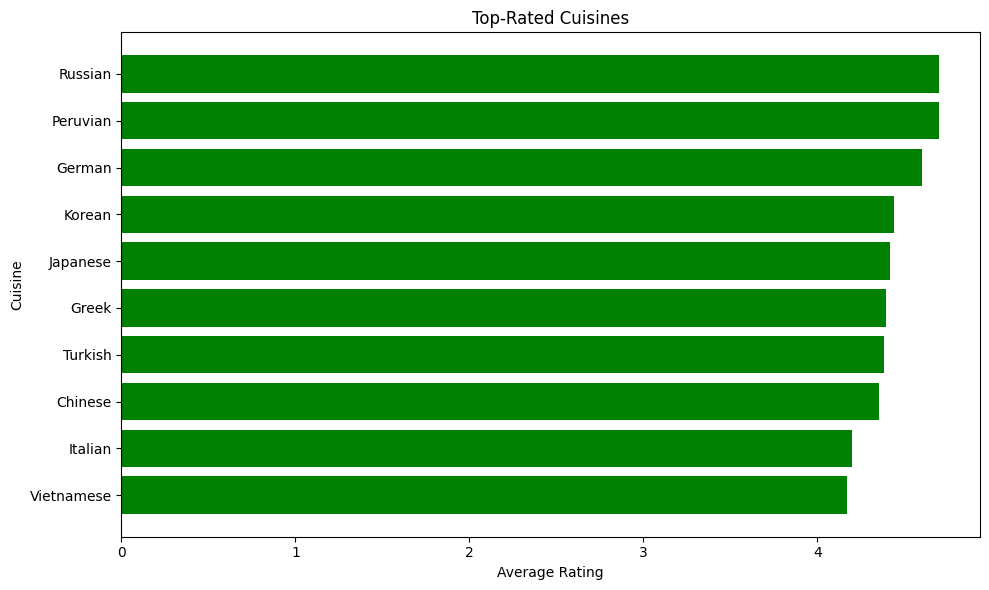

In [9]:
import matplotlib.pyplot as plt

# Plot top-rated cuisines
top_cuisines_to_plot = top_rated_cuisines.head(10)  # Adjust the number of cuisines to display

plt.figure(figsize=(10, 6))
plt.barh(top_cuisines_to_plot['cuisine'], top_cuisines_to_plot['average_rating'], color='green')
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.title("Top-Rated Cuisines")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest-rated cuisine at the top
plt.tight_layout()
plt.show()

Top Rated Cuisines by City


In [10]:
average_ratings = df.groupby(["searched_city", "cuisine"], as_index=False).agg(
    average_rating=("review_rating", "mean")
)

# Step 2: Rank cuisines within each city by average rating (descending order)
average_ratings["rank"] = (
    average_ratings.groupby("searched_city")["average_rating"]
    .rank(method="dense", ascending=False)
)

# Step 3: Filter to get the top cuisine per city
top_rated_cuisines_by_city = average_ratings[average_ratings["rank"] == 1].copy()

# Step 4: Format the average rating to two decimal places
top_rated_cuisines_by_city["average_rating"] = top_rated_cuisines_by_city["average_rating"].round(2)

# Step 5: Save the result to a CSV file
top_rated_cuisines_by_city.to_csv("top_rated_cuisines_by_city.csv", index=False)

# Display the result
print("Top Rated Cuisines by City:")
print(top_rated_cuisines_by_city)

Top Rated Cuisines by City:
       searched_city     cuisine  average_rating  rank
2            Anaheim       Greek            4.90   1.0
16           Astoria     Italian            4.42   1.0
26           Belmont     Turkish            4.70   1.0
39            Boston    Peruvian            4.77   1.0
52          Brooklyn      Korean            4.58   1.0
63           Burbank      French            4.80   1.0
64           Burbank      German            4.80   1.0
91         Cambridge    Peruvian            4.77   1.0
107      Charlestown    Peruvian            4.77   1.0
130          Chicago     Turkish            5.00   1.0
135       Dorchester      French            4.90   1.0
150         Glendale      French            4.80   1.0
151         Glendale      German            4.80   1.0
167         Glenview      French            5.00   1.0
179         Glenview     Turkish            5.00   1.0
183           Irvine       Greek            4.90   1.0
213      Jersey City  Vietnamese     

Most Popular Cuisine by State
Top Rated Cuisines by State


In [11]:
cuisine_counts = (
    df.groupby(["searched_state", "cuisine"])
    .size()
    .reset_index(name="cuisine_count")
)

# Step 2: Find the most popular cuisine in each state (rank by count descending)
cuisine_counts["rank"] = (
    cuisine_counts.groupby("searched_state")["cuisine_count"]
    .rank(method="dense", ascending=False)
)

most_popular_cuisine_by_state = cuisine_counts[cuisine_counts["rank"] == 1].copy()

# Step 3: Calculate the average review rating for each combination of state and cuisine
average_ratings_state = (
    df.groupby(["searched_state", "cuisine"])["review_rating"]
    .mean()
    .reset_index(name="average_rating")
)

# Step 4: Rank cuisines within each state by average rating (descending order)
average_ratings_state["rank"] = (
    average_ratings_state.groupby("searched_state")["average_rating"]
    .rank(method="dense", ascending=False)
)

# Step 5: Filter to get the top-rated cuisine per state
top_rated_cuisines_by_state = average_ratings_state[average_ratings_state["rank"] == 1].copy()

# Step 6: Format the average rating to two decimal places
top_rated_cuisines_by_state["average_rating"] = top_rated_cuisines_by_state["average_rating"].round(2)

# Save results to CSV
most_popular_cuisine_by_state.to_csv("most_popular_cuisine_by_state.csv", index=False)
top_rated_cuisines_by_state.to_csv("top_rated_cuisines_by_state.csv", index=False)

# Display results
print("Most Popular Cuisine by State:")
print(most_popular_cuisine_by_state)

print("\nTop Rated Cuisines by State:")
print(top_rated_cuisines_by_state)

Most Popular Cuisine by State:
   searched_state   cuisine  cuisine_count  rank
12             CA   Mexican            448   1.0
21             IL  American            555   1.0
47             MA   Italian            389   1.0
58             NJ  American            167   1.0
78             NY  American            932   1.0

Top Rated Cuisines by State:
   searched_state     cuisine  average_rating  rank
5              CA      German            4.80   1.0
39             IL     Turkish            5.00   1.0
53             MA    Peruvian            4.77   1.0
76             NJ  Vietnamese            5.00   1.0
92             NY    Peruvian            4.80   1.0


Top 10 Cities with the Highest Mean Review Rating

In [12]:
# Step 1: Group by 'searched_city' and calculate the mean review rating for each city
review_by_city = df.groupby("searched_city")["review_rating"].mean().reset_index()

# Step 2: Format the 'review_rating' column to two decimal places
review_by_city["review_rating"] = review_by_city["review_rating"].round(2)

# Step 3: Sort the result in descending order based on the mean review rating
top_cities = review_by_city.sort_values(by="review_rating", ascending=False)

# Step 4: Select the top 10 cities with the highest mean review rating
top_10_cities = top_cities.head(10)

# Display the result
print("Top 10 Cities with the Highest Mean Review Rating:")
print(top_10_cities)

Top 10 Cities with the Highest Mean Review Rating:
      searched_city  review_rating
17          Melrose           4.59
20           Revere           4.46
2           Belmont           4.45
24      West Covina           4.33
9        Dorchester           4.33
16  Manhattan Beach           4.31
0           Anaheim           4.31
12           Irvine           4.30
3            Boston           4.28
22         Torrance           4.28


Top 10 Cities with the Lowest Average Delivery Time

In [13]:
avg_delivery_time_by_city = df.groupby("searched_city")["delivery_time"].mean().reset_index()

# Step 2: Format the 'delivery_time' column to two decimal places
avg_delivery_time_by_city["delivery_time"] = avg_delivery_time_by_city["delivery_time"].round(2)

# Step 3: Sort the result in ascending order based on the mean delivery time
top_cities_low_delivery_time = avg_delivery_time_by_city.sort_values(by="delivery_time", ascending=True)

# Step 4: Select the top 10 cities with the lowest average delivery time
top_10_cities_low_delivery_time = top_cities_low_delivery_time.head(10)

# Display the result
print("Top 10 Cities with the Lowest Average Delivery Time:")
print(top_10_cities_low_delivery_time)

Top 10 Cities with the Lowest Average Delivery Time:
   searched_city  delivery_time
2        Belmont          26.30
20        Revere          26.32
1        Astoria          27.47
17       Melrose          28.10
15   Los Angeles          30.66
4       Brooklyn          31.12
18      New York          31.17
5        Burbank          32.44
0        Anaheim          32.95
12        Irvine          32.96


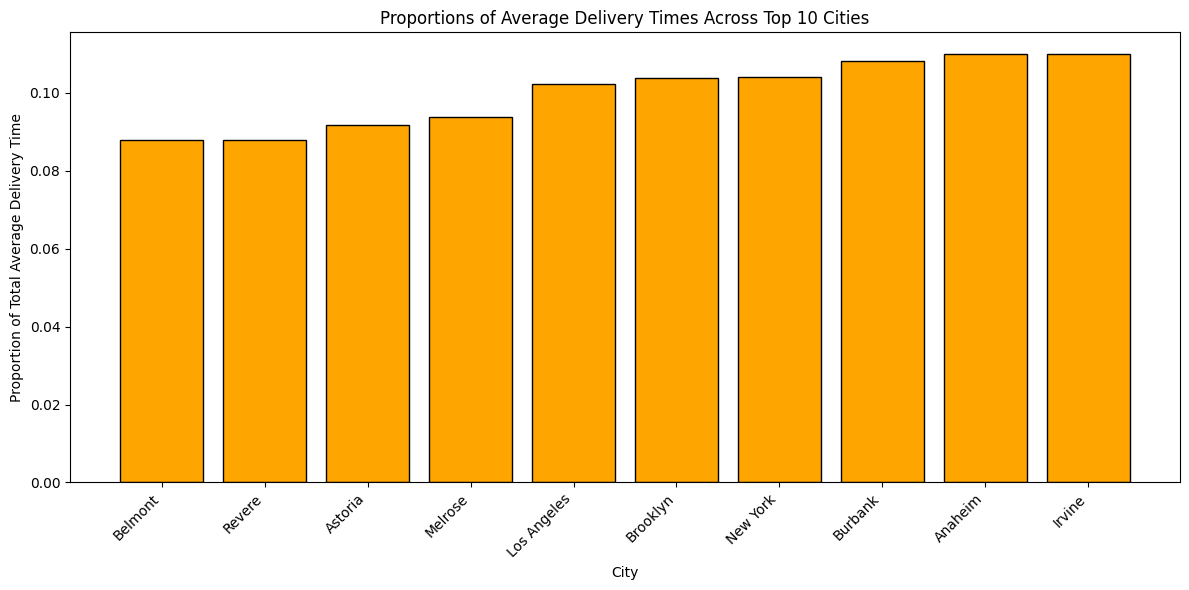

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Normalize delivery times to create proportions
proportions = top_10_cities_low_delivery_time["delivery_time"] / top_10_cities_low_delivery_time["delivery_time"].sum()

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(
    top_10_cities_low_delivery_time["searched_city"],
    proportions,
    color="orange",
    edgecolor="black"
)

# Customize the chart
plt.xlabel("City")
plt.ylabel("Proportion of Total Average Delivery Time")
plt.title("Proportions of Average Delivery Times Across Top 10 Cities")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()


In [15]:
import numpy as np
import pandas as pd

data = pd.read_csv('doordash.csv')

# Define a threshold for correlation (e.g., 0.8 for high correlation)
threshold = 0.8

numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()



# Identify features with high correlation
high_correlation = correlation_matrix.abs() > threshold

# Display the correlation matrix for reference
print("Correlation Matrix:")
print(correlation_matrix)

# Drop one of each pair of highly correlated features
columns_to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if high_correlation.iloc[i, j]:
            column = correlation_matrix.columns[i]
            columns_to_drop.add(column)

# Drop the selected features
reduced_data = data.drop(columns=columns_to_drop)

print(f"Features dropped due to high correlation: {columns_to_drop}")
print(f"Remaining features: {reduced_data.columns}")

Correlation Matrix:
                  searched_zipcode  searched_lat  searched_lng  latitude  \
searched_zipcode          1.000000     -0.729111     -0.952100 -0.725547   
searched_lat             -0.729111      1.000000      0.895519  0.913050   
searched_lng             -0.952100      0.895519      1.000000  0.853150   
latitude                 -0.725547      0.913050      0.853150  1.000000   
longitude                -0.921303      0.825236      0.947279  0.913464   
distance                  0.011275     -0.018786     -0.029519 -0.016428   
loc_number               -0.051194      0.032646      0.049453  0.032779   
delivery_time            -0.003804      0.204800      0.076929  0.225840   
review_count              0.091361     -0.058042     -0.085226 -0.080026   
review_rating             0.016553      0.007652     -0.015488  0.001138   

                  longitude  distance  loc_number  delivery_time  \
searched_zipcode  -0.921303  0.011275   -0.051194      -0.003804   
searche

In [16]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Load your dataset
data = pd.read_csv('doordash.csv')

# Encode categorical features
X = data.select_dtypes(include=['object']).apply(LabelEncoder().fit_transform)
y = data['delivery_time']  # Replace with your target column name

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importance
importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)

# Set a threshold for feature importance
threshold = 0.01  # 1% importance
selected_features = importance[importance['Importance'] > threshold]['Feature'].tolist()

# Reduce the dataset to selected features
X_selected = X[selected_features]

print(f"Selected Features ({len(selected_features)}):")
print(selected_features)

# Select top-K features
K = 5  # Number of top features to select
top_k_features = importance.head(K)['Feature'].tolist()

# Reduce the dataset to top-K features
X_top_k = X[top_k_features]

print(f"Top {K} Features:")
print(top_k_features)

Selected Features (9):
['delivery_time_raw', 'loc_name', 'address', 'cuisines', 'Specialty Items', 'Meal Types', 'searched_address', 'searched_city', 'Dietary Preferences']
Top 5 Features:
['delivery_time_raw', 'loc_name', 'address', 'cuisines', 'Specialty Items']


Random forest classifier benchmark for the model


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np

# Load the data
file_path = 'doordash.csv'  # Replace with your file path
data = pd.read_csv(file_path)



# Bin delivery_time into quantile-based categories: 'low', 'medium', 'high'
data['delivery_time_category'] = pd.qcut(
    data['delivery_time'], q=3, labels=['low', 'medium', 'high']
)

# Define features and target variable
numerical_features = ['review_count', 'distance']
categorical_features = ['cuisines', 'searched_city']
target = 'delivery_time_category'



# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Random Forest pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42))
])

# Split data into training and testing sets
X = data[numerical_features + categorical_features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)

# Add predictions and actual values to the test dataset
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Actual Delivery Time Category'] = y_test.values
X_test_with_predictions['Predicted Delivery Time Category'] = y_pred

# Display a sample of the test set with predictions
print("\nTest Set with Predictions:")
print(X_test_with_predictions.head())

Model Accuracy: 0.62

Classification Report:
              precision    recall  f1-score   support

        high       0.62      0.69      0.66      1132
         low       0.60      0.72      0.65      1164
      medium       0.64      0.41      0.50      1059

    accuracy                           0.62      3355
   macro avg       0.62      0.61      0.60      3355
weighted avg       0.62      0.62      0.61      3355


Test Set with Predictions:
       review_count  distance          cuisines searched_city  \
8777             20  1.127826           Italian       Chicago   
10973             1  1.580127  Italian|American     Cambridge   
9921           2000  1.954472          American     Cambridge   
5106           1807  0.470757          American      Glendale   
3013            234  1.856974           Mexican      Brooklyn   

      Actual Delivery Time Category Predicted Delivery Time Category  
8777                           high                             high  
10973        

logistic regression classifier benchmark for the model


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Load the data
file_path = 'doordash.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Ensure delivery_time is numeric and handle missing values
data['delivery_time'] = pd.to_numeric(data['delivery_time'], errors='coerce')
data = data.dropna(subset=['delivery_time'])  # Drop rows where delivery_time is missing

# Bin delivery_time into categories: 'low', 'medium', 'high'
bins = [0, 20, 40, float('inf')]  # Adjust thresholds as needed
labels = ['low', 'medium', 'high']
data['delivery_time_category'] = pd.cut(data['delivery_time'], bins=bins, labels=labels)

# Define features and target variable
numerical_features = ['review_count', 'distance', 'searched_lat', 'searched_lng']
categorical_features = ['cuisines', 'searched_zipcode']
target = 'delivery_time_category'

# Handle missing values for features
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].mean())
data[categorical_features] = data[categorical_features].fillna('Unknown')

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Random Forest Classifier pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split data into training and testing sets
X = data[numerical_features + categorical_features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)

# Add predictions and actual values to the test dataset
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Actual Delivery Time Category'] = y_test.values
X_test_with_predictions['Predicted Delivery Time Category'] = y_pred

# Display a sample of the test set with predictions
print("\nTest Set with Predictions:")
print(X_test_with_predictions.head())

Model Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

        high       0.66      0.59      0.62       926
         low       0.43      0.18      0.26       141
      medium       0.80      0.87      0.83      2288

    accuracy                           0.76      3355
   macro avg       0.63      0.55      0.57      3355
weighted avg       0.75      0.76      0.75      3355


Test Set with Predictions:
       review_count  distance  searched_lat  searched_lng          cuisines  \
8777             20  1.127826     41.947969    -87.786171           Italian   
10973             1  1.580127     42.365300    -71.103660  Italian|American   
9921           2000  1.954472     42.365300    -71.103660          American   
5106           1807  0.470757     34.137766   -118.261433          American   
3013            234  1.856974     40.631075    -73.997695           Mexican   

       searched_zipcode Actual Delivery Time Category  \
8777          

Preprocessing

In [19]:
df_1 = pd.read_csv('doordash.csv')
data = df_1.drop_duplicates()


# Step 3: Parse `RunDate` into a datetime object
data['RunDate'] = pd.to_datetime(data['RunDate'], format='%d/%m/%y %H:%M')

# Step 4: Split delimited columns into lists
data['Specialty Items'] = data['Specialty Items'].str.split('|')
data['Meal Types'] = data['Meal Types'].str.split('|')
data['Dietary Preferences'] = data['Dietary Preferences'].str.split('|')

# Step 5: Handle outliers (using IQR for demonstration)
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

numeric_columns = ['distance', 'review_count', 'review_rating']
for col in numeric_columns:
    data = remove_outliers(data, col)


# Step 7: Check for missing values and handle them if needed
missing_counts = data.isnull().sum()
print("Missing values in each column:")
print(missing_counts)

# Optionally, drop rows with missing values (if any exist after cleaning)
data = data.dropna()

# Save the cleaned dataset
data.to_csv("cleaned_doordash_1.csv", index=False)

Missing values in each column:
searched_zipcode       0
searched_lat           0
searched_lng           0
searched_address       0
searched_state         0
searched_city          0
searched_metro         0
latitude               0
longitude              0
distance               0
loc_name               0
loc_number             0
address                0
cuisines               0
delivery_time_raw      0
delivery_time          0
review_count           0
review_rating          0
RunDate                0
Specialty Items        0
Meal Types             0
Dietary Preferences    0
dtype: int64


In [20]:
df_1 = pd.read_csv('doordash.csv')
data = df_1.drop_duplicates()

# Step 2: Parse `RunDate` into a datetime object
data['RunDate'] = pd.to_datetime(data['RunDate'], format='%d/%m/%y %H:%M', errors='coerce')

# Step 3: Split delimited columns into lists
columns_to_split = ['Specialty Items', 'Meal Types', 'Dietary Preferences']
for col in columns_to_split:
    data[col] = data[col].str.split('|')

# Step 4: Handle outliers (using IQR)
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply IQR-based outlier removal to numeric columns
numeric_columns = ['distance', 'review_count', 'review_rating']
for col in numeric_columns:
    if col in data.columns:
        data = remove_outliers(data, col)

# Step 5: Fill missing values for numeric and categorical columns
# For numeric columns, fill with median
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# For categorical columns, fill with 'Unknown'
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna('Unknown')

# Step 6: Feature engineering - extract useful features from `RunDate`
data['day_of_week'] = data['RunDate'].dt.day_name()
data['hour_of_day'] = data['RunDate'].dt.hour

# Step 7: Encode list columns (convert lists into counts or indicators)
for col in columns_to_split:
    if col in data.columns:
        # Count the number of items in the list
        data[col + '_count'] = data[col].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Step 8: Binning - Categorize delivery time into 'low', 'medium', 'high'
# Ensure delivery_time is numeric
data['delivery_time'] = pd.to_numeric(data['delivery_time'], errors='coerce')

# Remove rows where delivery_time is missing
data = data.dropna(subset=['delivery_time'])

# Define custom bins
bins = [0, 15, 40, float('inf')]  # Adjust thresholds as needed
labels = ['low', 'medium', 'high']
data['delivery_time_category'] = pd.cut(data['delivery_time'], bins=bins, labels=labels)

# Step 9: Standardize column names (optional, for consistency)
data.columns = [col.lower().replace(' ', '_') for col in data.columns]

# Step 10: Save the cleaned dataset
data.to_csv("enhanced_cleaned_doordash_with_binning.csv", index=False)

Logistic Regression classifier benchmark for the model


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load the data
file_path = 'enhanced_cleaned_doordash_with_binning.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Ensure delivery_time is numeric and handle missing values
data['delivery_time'] = pd.to_numeric(data['delivery_time'], errors='coerce')
data = data.dropna(subset=['delivery_time'])  # Drop rows where delivery_time is missing



# Define features and target variable
numerical_features = ['review_count', 'distance']
categorical_features = ['cuisines', 'searched_city']
target = 'delivery_time_category'

# Handle missing values for features
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].mean())
data[categorical_features] = data[categorical_features].fillna('Unknown')

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Logistic regression pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, multi_class='ovr'))  # Multi-class classification
])

# Split data into training and testing sets
X = data[numerical_features + categorical_features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)

# Add predictions and actual values to the test dataset
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Actual Delivery Time Category'] = y_test.values
X_test_with_predictions['Predicted Delivery Time Category'] = y_pred

# Display a sample of the test set with predictions
print("\nTest Set with Predictions:")
print(X_test_with_predictions.head())

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.

Model Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

        high       0.66      0.53      0.58       712
         low       0.00      0.00      0.00        13
      medium       0.82      0.89      0.85      1740

    accuracy                           0.78      2465
   macro avg       0.49      0.47      0.48      2465
weighted avg       0.76      0.78      0.77      2465


Test Set with Predictions:
      review_count  distance       cuisines  searched_city  \
2344             2  0.945006       American       Brooklyn   
7557           340  1.144583   Chinese|Thai    Charlestown   
3121            45  1.060434       American  Staten Island   
3921            27  1.099053        Mexican       Glendale   
1608            14  1.486277  Miscellaneous       Brooklyn   

     Actual Delivery Time Category Predicted Delivery Time Category  
2344                          high                           medium  
7557                        mediu

Random forest after preprocessing

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Load the data
file_path = 'enhanced_cleaned_doordash_with_binning.csv'  # Replace with your file path
data = pd.read_csv(file_path)




# Define features and target variable
numerical_features = ['review_count', 'distance']
categorical_features = ['cuisines', 'searched_city']
target = 'delivery_time_category'


# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Random Forest Classifier pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split data into training and testing sets
X = data[numerical_features + categorical_features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)

# Add predictions and actual values to the test dataset
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Actual Delivery Time Category'] = y_test.values
X_test_with_predictions['Predicted Delivery Time Category'] = y_pred

# Display a sample of the test set with predictions
print("\nTest Set with Predictions:")
print(X_test_with_predictions.head())

Model Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

        high       0.74      0.63      0.68       712
         low       1.00      0.31      0.47        13
      medium       0.85      0.91      0.88      1740

    accuracy                           0.82      2465
   macro avg       0.86      0.61      0.68      2465
weighted avg       0.82      0.82      0.82      2465


Test Set with Predictions:
      review_count  distance       cuisines  searched_city  \
2344             2  0.945006       American       Brooklyn   
7557           340  1.144583   Chinese|Thai    Charlestown   
3121            45  1.060434       American  Staten Island   
3921            27  1.099053        Mexican       Glendale   
1608            14  1.486277  Miscellaneous       Brooklyn   

     Actual Delivery Time Category Predicted Delivery Time Category  
2344                          high                             high  
7557                        mediu

**Cuisine Recommendation System**

A recommendation system that suggests cuisines or specialty items to users based on their location and preferences

ALS (Alternating Least Squares) algorithm to generate recommendations for restaurants based on user review ratings.
Predict the review ratings for different cuisines, specialty items, meal types, and dietary preferences in each city, leveraging the trained ALS model.

In [24]:
from pyspark.sql.functions import explode, split, col, isnan, when, max
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import lit
from pyspark.ml.tuning import TrainValidationSplit, ParamGridBuilder

# Initialize Spark session
spark = SparkSession.builder.appName("Cuisine Recommendation System").getOrCreate()

# Define the path to your data file
data_path = 'doordash.csv'  # Replace with the actual path to your CSV file

df = spark.read.csv(data_path, header=True, inferSchema=True)

# Convert 'review_rating' to float type to ensure compatibility with ALS model
df = df.withColumn("review_rating", df["review_rating"].cast("float"))

# Filter out rows where 'review_rating' is NaN, Null, or zero
df = df.filter(df["review_rating"].isNotNull() & (~isnan(df["review_rating"])) & (df["review_rating"] > 0))

# Exploding delimited columns into arrays and filtering out 'Miscellaneous'
def explode_columns(dataframe, columns):
    for column in columns:
        # Explode the column into multiple rows
        dataframe = dataframe.withColumn(column, explode(split(col(column), "\|")))
        # Filter out 'Miscellaneous'
        dataframe = dataframe.filter(~col(column).contains("Miscellaneous"))
    return dataframe

# Columns to be exploded
columns_to_explode = ['cuisines', 'Specialty Items', 'Meal Types', 'Dietary Preferences']
df = explode_columns(df, columns_to_explode)

# Indexing needed for ALS algorithm
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index") for column in columns_to_explode + ["searched_city"]]

pipeline = Pipeline(stages=indexers)
df_indexed = pipeline.fit(df).transform(df)

# Split the data into training and test sets
(train, test) = df_indexed.randomSplit([0.8, 0.2], seed=42)

# ALS model parameters
als = ALS(maxIter=5, regParam=0.01, userCol="searched_city_index", itemCol="cuisines_index", ratingCol="review_rating", coldStartStrategy="drop")

# Fit the ALS model to the training data
model = als.fit(train)

# Generate predictions on the test set
predictions = model.transform(test)

# Evaluate the model
evaluator = RegressionEvaluator(metricName="rmse", labelCol="review_rating", predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error on test data = " + str(rmse))

# Show predictions
# predictions.select('searched_city', 'cuisines', 'review_rating', 'prediction').show()

# Convert predictions to pandas dataframe and save to CSV
predictions_df = predictions.select('searched_city', 'cuisines', 'Specialty Items', 'Meal Types', 'Dietary Preferences', 'review_count', 'review_rating', 'prediction').toPandas()
predictions_df.to_csv('predictions.csv', index=False)

# Display the first 20 rows of predictions
predictions_df.head(20)

Root-mean-square error on test data = 0.22425902103385495


,searched_city,cuisines,Specialty Items,Meal Types,Dietary Preferences,review_count,review_rating,prediction
0,Manhattan Beach,Mexican,Tacos,Lunch,Vegetarian,2000,4.5,4.695019
1,Manhattan Beach,Mexican,Sandwiches,Beverages,Gluten-Free,2000,4.7,4.695019
2,Manhattan Beach,Mexican,Tacos,Beverages,Vegan,2000,4.7,4.695019
3,Burbank,Mexican,Tacos,Breakfast,Vegetarian,13,4.5,4.671008
4,Burbank,Mexican,Tacos,Lunch,Vegan,193,4.6,4.671008
5,New York,Mexican,Burgers,Breakfast,Halal,58,4.5,4.361750
6,New York,Mexican,Tacos,Desserts,Vegan,1778,4.7,4.361750
7,Boston,Mexican,Tacos,Lunch,Vegetarian,2000,4.1,4.253860
8,Glendale,Mexican,Tacos,Beverages,Vegan,991,4.8,4.630992
9,Glendale,Mexican,Tacos,Beverages,Vegetarian,991,4.8,4.630992


In [25]:
# Function to retrieve the top cuisine recommendation for each city
def get_top_cuisine_recommendations(predictions_df):
    # Identify the cuisine with the highest predicted rating per city
    return predictions_df.loc[predictions_df.groupby('searched_city')['prediction'].idxmax()].reset_index(drop=True)

# Function to determine the most frequently occurring value for each category
def get_most_common_values(df, column):
    return df.groupby('searched_city')[column].agg(lambda x: x.value_counts().idxmax()).reset_index()

# Generate top cuisine recommendations per city
top_cuisine_recommendations = get_top_cuisine_recommendations(predictions_df)

# Determine the most common dietary preference, specialty item, and meal type per city
most_common_dietary_preferences = get_most_common_values(df_indexed.toPandas(), 'Dietary Preferences')
most_common_specialty_items = get_most_common_values(df_indexed.toPandas(), 'Specialty Items')
most_common_meal_types = get_most_common_values(df_indexed.toPandas(), 'Meal Types')
most_common_cuisine_types = get_most_common_values(df_indexed.toPandas(), 'cuisines')

# Combine recommendations with most common values
recommendations = (
    top_cuisine_recommendations
    .merge(most_common_dietary_preferences, on='searched_city')
    .merge(most_common_specialty_items, on='searched_city')
    .merge(most_common_meal_types, on='searched_city')
    .merge(most_common_cuisine_types, on='searched_city')
)

# Rename columns for better clarity
recommendations.rename(columns={
    'cuisines_x': 'Predicted Cuisine',
    'Specialty Items_x': 'Predicted Specialty Item',
    'Meal Types_x': 'Predicted Meal Type',
    'Dietary Preferences_x': 'Predicted Dietary Preference',
    'Dietary Preferences_y': 'Expected Dietary Preference',
    'Specialty Items_y': 'Expected Specialty Item',
    'Meal Types_y': 'Expected Meal Type',
    'cuisines_y': 'Expected Cuisine'
}, inplace=True)

# Remove unnecessary columns
recommendations.drop(columns=['review_rating', 'prediction', 'review_count'], inplace=True)

# Organize columns to display predicted values first, followed by expected values
column_order = [
    'searched_city', 'Predicted Cuisine', 'Expected Cuisine',
    'Predicted Specialty Item', 'Expected Specialty Item',
    'Predicted Meal Type', 'Expected Meal Type',
    'Predicted Dietary Preference', 'Expected Dietary Preference'
]

recommendations = recommendations[column_order]

# Save recommendations to a CSV file
recommendations.to_csv('recommendations.csv', index=False)

# Display the first 20 rows
recommendations.head(20)


,searched_city,Predicted Cuisine,Expected Cuisine,Predicted Specialty Item,Expected Specialty Item,Predicted Meal Type,Expected Meal Type,Predicted Dietary Preference,Expected Dietary Preference
0,Anaheim,Mediterranean,American,Sandwiches,Tacos,Lunch,Lunch,Vegetarian,Vegan
1,Boston,French,American,Salad,Sandwiches,Beverages,Lunch,Gluten-Free,Gluten-Free
2,Brooklyn,Seafood,American,Indian,Burgers,Appetizers,Dinner,Vegetarian,Vegetarian
3,Burbank,Mexican,Mexican,Tacos,Tacos,Breakfast,Beverages,Vegetarian,Vegan
4,Cambridge,American,Seafood,Burgers,Salad,Breakfast,Beverages,Vegetarian,Gluten-Free
5,Charlestown,American,Seafood,Tacos,Salad,Lunch,Beverages,Gluten-Free,Gluten-Free
6,Chicago,Italian,American,Indian,Sandwiches,Beverages,Appetizers,Gluten-Free,Vegan
7,Dorchester,French,American,Salad,Sandwiches,Breakfast,Lunch,Gluten-Free,Gluten-Free
8,Glendale,Vietnamese,Mexican,Ramen,Tacos,Beverages,Beverages,Vegan,Vegan
9,Glenview,American,American,Tacos,Tacos,Lunch,Lunch,Gluten-Free,Vegan


<ipython-input-26-ed427c40b0e3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=recommendations, x='Predicted Cuisine', order=recommendations['Predicted Cuisine'].value_counts().index[:10], palette='viridis')


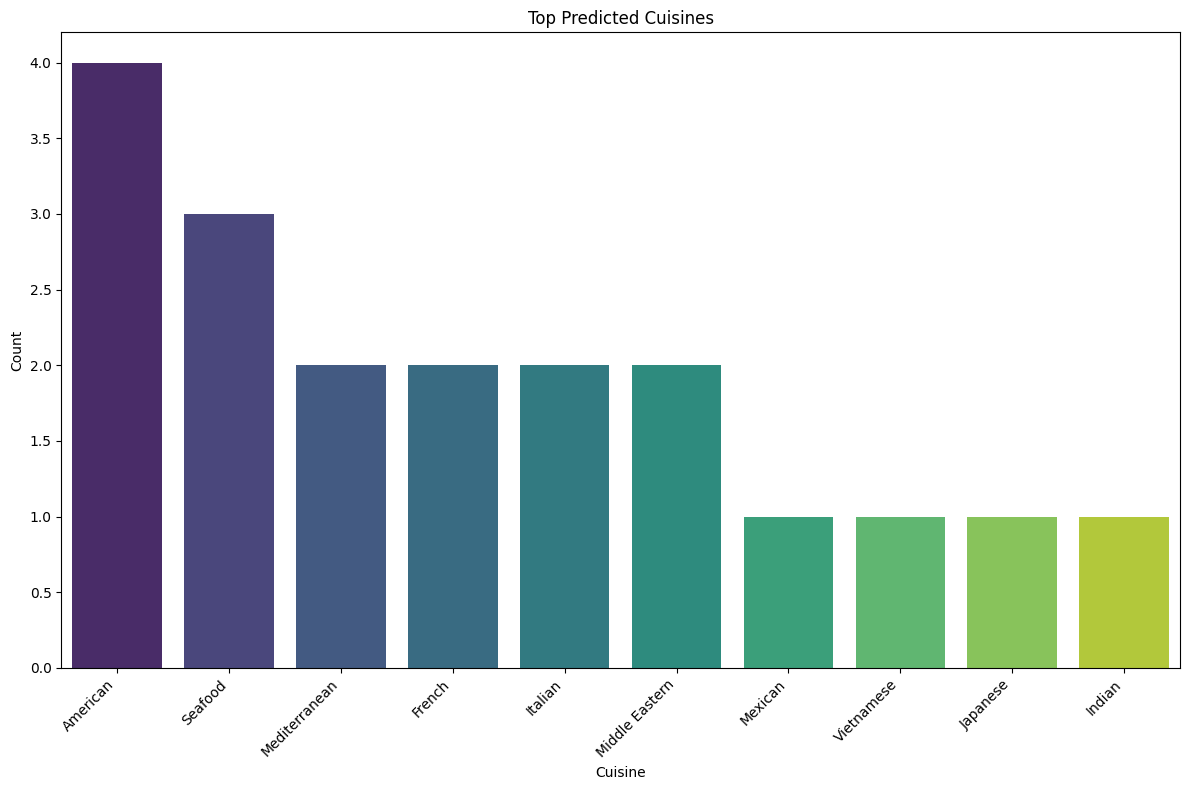

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the top predicted and expected cuisines
plt.figure(figsize=(12, 8))
sns.countplot(data=recommendations, x='Predicted Cuisine', order=recommendations['Predicted Cuisine'].value_counts().index[:10], palette='viridis')
plt.title('Top Predicted Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()